# The Time-Independent Schrodinger Equation

The Time Independent Schrodinger Equation of a confined quantum particle

$$ -\frac{\hbar^2}{2m}\frac{\partial^2}{\partial x^2}\psi(x,t) + V(x) \psi(x,t) = E \psi(x,t) $$
$$ \psi(0) = \psi(L) = 0 $$

is an example of the **regular Sturm-Liuville eigenvalue problem**. What's beautiful about this is that

* There exists and infinite set of real eigenvalues $E_0 < E_1 < ...$ with a smallest eigenvalue denoted $E_0$.
* The corresponding eigenfunctions $\psi^{(0)}, \psi^{(1)}, ...$ are **complete**. This means that any piecewise 
smooth function $f(x)$ on $\left[0,L\right]$ can be constructed as a linear cimbination of them: $f(x) \sim \sum_{i} a_i \psi^{(1)}$
* The eigenfunctions are **orthogonal** $\left( \int_{0}^{L} \psi^{(i)}(x) \psi^{(j)}(x) \,\mathrm{d}x = 0 \: \text{when} \: i \ne j \right)$

The **infinite square well** is a particular case of a confined quantum particle when $V = 0$. Here we have $\psi^{(n)} = \sqrt{\frac{2}{L}} \sin{\left(n \pi x/L\right)}$ and $E_n = \frac{n^2 \pi^2 \hbar^2}{2 m L^2}$. In general, when $V \ne 0$, the eigenfunctions $\psi^{(n)}$ are more complicated but also orthogonal and complete complete as guaranteed by the Sturm-Liouville theorem.

# Mathematical formulation

Since we eventually plan on using numerical methods to slove this problem, we must ensure we are working with dimesionless quantities. I start by choosing the common physics convention $\hbar = 1$ and multiply the equation by $m$ to get

$$ -\frac{1}{2}\frac{d^2 \psi}{dx^2} + m V(x) \psi = m E \psi $$

We still have that pesky dimensionfull quantity $x$ in the derivative. Making the substitution to the dimensionless quantity $y = x/L$ yields the equation and boundary condition

$$ -\frac{1}{2}\frac{d^2 \psi}{dy^2} + m L^2 V(y) \psi = m L^2 E \psi $$
$$ \psi(y = 0) = \psi(y=1) = 0 $$

This is much easier to tackle numerically: it just means we are require to define $m L^2 V$ as opposed to $V$ on its own.

Lets massage this equation even more and put  it into a discete form. We can do this by  transforming the **differentila equation** above into a **difference** equation by using discrete intervals $\Delta y$. Using the fact that a second order derivative can be approximated as

$$\frac{d^2f}{dx^2}_{x=j\Delta x} = \frac{f_{j+1}-2 f_{j}+f_{j-1}}{\Delta x^2}$$

where $f_j = f\left( j \Delta x \right)$, we can rewrite our equation as

$$-\frac{1}{2} \frac{\psi_{j+1}-2 \psi_{j}+\psi_{j-1}}{\Delta y^2} + m L^2 V_j \psi_j = m L^2 E \psi_j $$

and after some manipulation

$$-\frac{1}{2 \Delta y^2} \psi_{j+1} + \left( \frac{1}{\Delta y^2} + m L^2 V_j\right) \psi_j -\frac{1}{2 \Delta y^2} \psi_{j-1} =m L^2 E \psi_j $$

This is essentially a large system of linear equations:
* $-\frac{1}{2 \Delta y^2} \psi_{2} + \left( \frac{1}{\Delta y^2} + m L^2 V_{1}\right) \psi_{1} -\frac{1}{2 \Delta y^2} \psi_{0} =m L^2 E \psi_1 $
* $-\frac{1}{2 \Delta y^2} \psi_{3} + \left( \frac{1}{\Delta y^2} + m L^2 V_{2}\right) \psi_{2} -\frac{1}{2 \Delta y^2} \psi_{1} =m L^2 E \psi_2 $
* $...$
* $-\frac{1}{2 \Delta y^2} \psi_{N} + \left( \frac{1}{\Delta y^2} + m L^2 V_{N-1}\right) \psi_{N-1} -\frac{1}{2 \Delta y^2} \psi_{N-2} =m L^2 E \psi_{N-1} $

where $N = \frac{1}{\Delta y}$ is the number of points we use in the interval $y \in \left[ 0, L \right]$. This can be written as a **tridiagonal** matrix equation when we recall the bondary conditions $\psi_0 = \psi_N = 0$

$$ \begin{bmatrix}\frac{1}{\Delta y^2}+mL^2V_1 & -\frac{1}{2 \Delta y^2} &   0 & 0...\\ -\frac{1}{2 \Delta y^2} & \frac{1}{\Delta y^2}+mL^2V_2 & -\frac{1}{2 \Delta y^2} & 0... \\ ...& ... & ... & -\frac{1}{2 \Delta y^2}\\...0 & 0 & -\frac{1}{2 \Delta y^2} & \frac{1}{\Delta y^2}+mL^2V_{N-1} \\ \end{bmatrix} \begin{bmatrix} \psi_1 \\ \psi_2 \\ ... \\ \psi_{N-1} \end{bmatrix} = mL^2 E \begin{bmatrix} \psi_1 \\ \psi_2 \\ ... \\ \psi_{N-1} \end{bmatrix} $$

$$ \psi_0 = \psi_N = 0$$

Hence to solve this problem we just need the eigenvectors and eigenvalues of the matrix on the left side of this equation. Before we start programming, let's fo a consistency check. A **Toeplitz** matrix is a special kind of tridiagonal matrix where the elements on each diagonal are the same: 

$$ \begin{bmatrix} a & b & 0 & 0 & ... \\ c & a & b & 0 & ... \\ ... & ... & ... & ... &  b \\ ... & 0 & 0 & c & a \end{bmatrix} $$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh_tridiagonal

Define what $N$ and $dy$ is

In [2]:
N = 100
dy = 1/N
y = np.linspace(0, 1, N+1)

Define potential $mL^2 V$

In [3]:
def mL2V(y):
    return 1000*np.sin(20*y) * y**4 
    #return 1000*(y-1/2)**2         # 2nd example

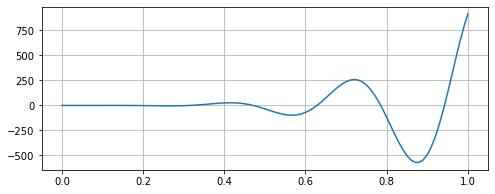

In [4]:
plt.figure(figsize=(8,3))
plt.plot(y, mL2V(y))
plt.grid()

$$ \begin{bmatrix}\frac{1}{\Delta y^2}+mL^2V_1 & -\frac{1}{2 \Delta y^2} &   0 & 0...\\ -\frac{1}{2 \Delta y^2} & \frac{1}{\Delta y^2}+mL^2V_2 & -\frac{1}{2 \Delta y^2} & 0... \\ ...& ... & ... & -\frac{1}{2 \Delta y^2}\\...0 & 0 & -\frac{1}{2 \Delta y^2} & \frac{1}{\Delta y^2}+mL^2V_{N-1} \\ \end{bmatrix} \begin{bmatrix} \psi_1 \\ \psi_2 \\ ... \\ \psi_{N-1} \end{bmatrix} = mL^2 E \begin{bmatrix} \psi_1 \\ \psi_2 \\ ... \\ \psi_{N-1} \end{bmatrix} $$

$$ \psi_0 = \psi_N = 0$$

In [5]:
d = 1/dy**2 + mL2V(y)[1:-1]
e = -1/(2*dy**2) * np.ones(len(d)-1)

In [6]:
"""
Solve eigenvalue problem for a real symmetric tridiagonal matrix.
This function makes use of LAPACK S/DSTEMR routines.
"""
w, v = eigh_tridiagonal(d, e)

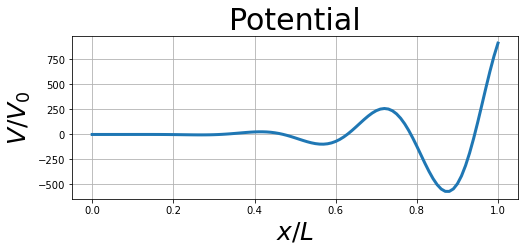

In [7]:
plt.figure(figsize=(8,3))
plt.plot(y, mL2V(y), lw=3)
plt.title('Potential', fontsize=30)
plt.ylabel('$V/V_0$', fontsize=25)
plt.xlabel('$x/L$', fontsize=25)
plt.grid()
plt.savefig('v3p1.png', dpi=200)

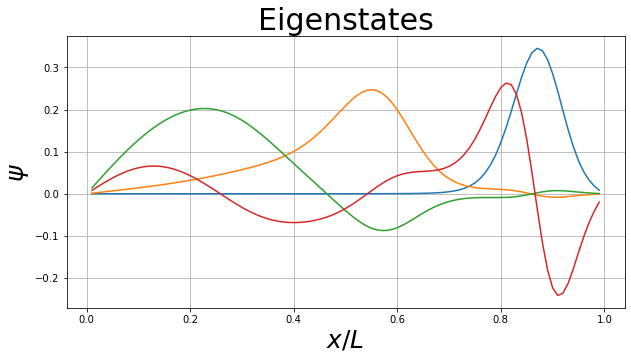

In [8]:
plt.figure(figsize=(10,5))
plt.plot(y[1:-1], v.T[0])
plt.plot(y[1:-1], v.T[1])
plt.plot(y[1:-1], v.T[2])
plt.plot(y[1:-1], v.T[3])
plt.title('Eigenstates', fontsize=30)
plt.ylabel('$\psi$', fontsize=25)
plt.xlabel('$x/L$', fontsize=25)
plt.grid()
plt.savefig('v3p2.png', dpi=200)



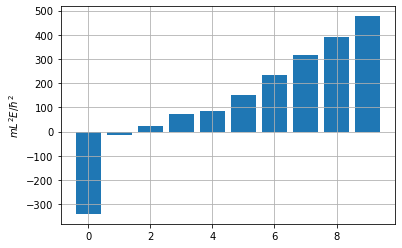

In [9]:
plt.bar(np.arange(0, 10, 1), w[0:10])
plt.ylabel('$mL^2 E/\hbar^2$')
plt.grid()